In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
pip install pandas numpy scikit-learn matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Load dataset (replace with your file path)
file_path = "customer_data2.xlsx"
df = pd.read_excel(file_path)

In [16]:
# Drop Customer ID (not useful for regression)
df = df.drop(columns=["Customer ID"])

In [18]:
# Define independent variables (X) and dependent variable (y)
X = df.drop(columns=["Customer Lifetime Value (CLV)"])  # Predictors
y = df["Customer Lifetime Value (CLV)"]  # Target variable

In [20]:
# Add constant for statsmodels
X_sm = sm.add_constant(X)

In [22]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [26]:
# Display regression results
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Customer Lifetime Value (CLV)   R-squared:                       0.965
Model:                                       OLS   Adj. R-squared:                  0.963
Method:                            Least Squares   F-statistic:                     595.5
Date:                           Fri, 07 Feb 2025   Prob (F-statistic):          4.83e-107
Time:                                   12:09:42   Log-Likelihood:                -1591.7
No. Observations:                            160   AIC:                             3199.
Df Residuals:                                152   BIC:                             3224.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---

In [28]:
# Predict on test set
y_pred = model.predict(sm.add_constant(X_test))

In [30]:
# Evaluate the model
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-squared (R²): {r2_score(y_test, y_pred):.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 4625.50
Mean Squared Error (MSE): 35087635.51
Root Mean Squared Error (RMSE): 5923.48
R-squared (R²): 0.9511


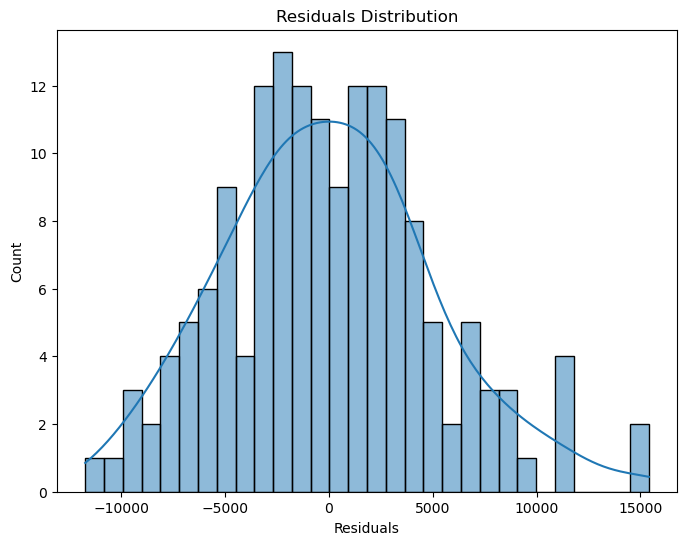

In [32]:
# **Step 5: Check Residuals**
plt.figure(figsize=(8,6))
sns.histplot(model.resid, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

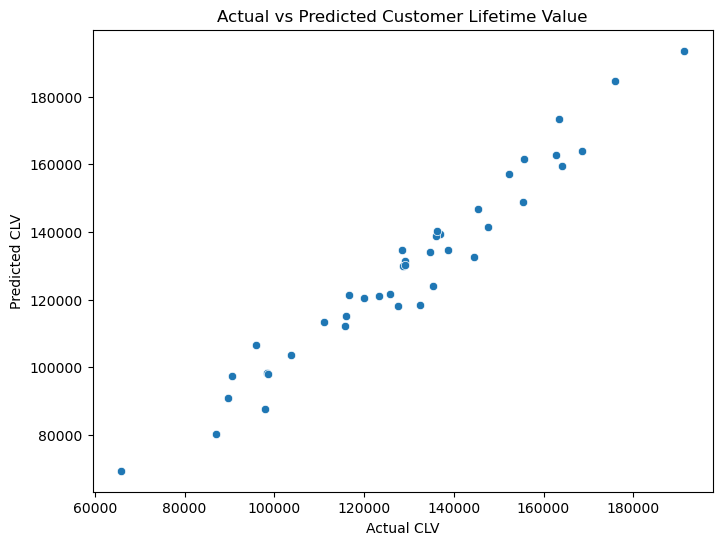

In [72]:
# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value")
plt.show()